# Plot and analyze results of CO or ONe nova MESA computations

#### Read comments at the beginning of each cell to understand what it does

In [1]:
# on an astrohub server use ipympl that enables interactive features of 
# matplotlib in a Jupyter notebook and in JupyterLab
%pylab ipympl  

# for a jupyter classic notebook use
#%pylab nbagg

from nugridpy import mesa as ms
from nugridpy import utils as ut

# begin counting figures
ifig=0
for i in range(0,10000):
    close(i)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the following commands allow to produce a nice pdf version of the notebook with figures:
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

rcParams.update({'axes.titlesize': 16,
                 'axes.labelsize': 16, 
                 'ytick.labelsize': 16,
                 'xtick.labelsize': 16,
                 'legend.fontsize': 14,
                 'figure.figsize': (12,8),
                 'font.size': 16})

In [3]:
#### this cell defines functions that allow to suppress unnecessary output information
import os
from contextlib import contextmanager
@contextmanager
def redirect_stdout(new_target):
    old_target, sys.stdout = sys.stdout, new_target
    try:
        yield new_target
    finally:
        sys.stdout = old_target
def get_devnull():
    #return open(os.devnull, "w")
    return open('log_stuff.txt', "w") #where all the stuff goes you don't want to see
####

In [4]:
# astronomical and physical constants in SI units
from astropy import constants as const
from astropy import units as u

Msun = (const.M_sun).value
Rsun = (const.R_sun).value
Lsun = (const.L_sun).value
GN = (const.G).value  # Newton's constant 
sigma = (const.sigma_sb).value
print ('Msun =',Msun)
print ('Rsun =',Rsun)
print ('Lsun =',Lsun)
print ("Newton's G =",GN)
print ("Stefan-Boltzmann constant =",sigma)

Msun = 1.988409870698051e+30
Rsun = 695700000.0
Lsun = 3.828e+26
Newton's G = 6.6743e-11
Stefan-Boltzmann constant = 5.6703744191844314e-08


In [5]:
# name of your directory on astrohub/outreach server
name = 'pavelden' # 'your_name'

# choose between CO and ONe nova cases

#nova_case = 'co_nova'
nova_case = 'ne_nova'

# e.g. CO Nova with M=1.15, T=12, dM/dt=2e-10, 3010 cycles obtained with ./run_mesa 1.15 12 X 3010
# or ONe Nova with M=1.3, T=30, dM/dt=2e-10, 2010 cycles obtained with ./run_mesa 1.3 30 X 2010

# path to MESA nova work directory
# on astrohub/outreach server
mesa_work_dir = '/user/scratch14_outreach/'+name+'/canpan_projects/nova/nova_framework_canpan/' 

In [6]:
# read profiles.index file from path to LOGS directory that contains results of MESA nova computations
nova_dir = mesa_work_dir+nova_case+'/LOGS/'
f = open(nova_dir+'profiles.index', 'r')

profiles = []

i=0
for line in f:
    if i >= 1:
        profiles.append(int(float(line.split()[0])))
    i += 1
    
f.close()

print ("There are",len(profiles),"profiles for the following models:\n", profiles)

There are 103 profiles for the following models:
 [1, 11, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2010]


In [7]:
# select profiles of every_nth_1 model before and every_nth_2 model after cycle_1 along evolutionary track to plot
cycle_1 = 500
every_nth_1 = 4
every_nth_2 = 16

model_sel = []

for i in range(len(profiles)):
    if profiles[i] <= cycle_1:
        if i%every_nth_1 == 0:
            model_sel.append(profiles[i])
    else:
        if i%every_nth_2 == 0:
            model_sel.append(profiles[i]) 

model_sel

[1, 60, 140, 220, 300, 380, 460, 620, 940, 1260, 1580, 1900]

Requested new history.datasa; create new from history.data
 reading ...100% 



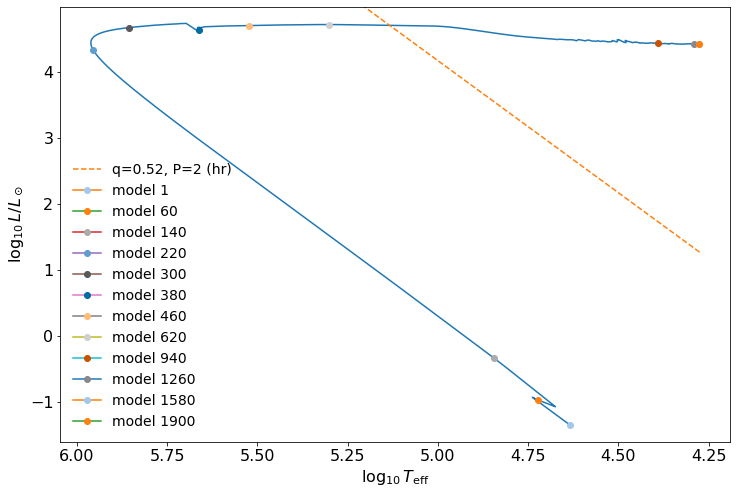

<Figure size 864x576 with 0 Axes>

In [8]:
# plot nova evolutionary track
sh = ms.history_data(nova_dir,clean_starlog=True)
age = sh.get('star_age')
model = sh.get('model_number')
lgL = sh.get('log_L')
lgTeff = sh.get('log_Teff')

sh.hrd()

# plot line of constant WD Roche lobe radius
# to calculate it, I use equation (2) from https://ui.adsabs.harvard.edu/abs/1983ApJ...268..368E/abstract
# and Kepler's law

m1 = 1.3 # WD mass in solar units
m2 = 2.5 # WD companion mass in solar units
P = 2 # WD orbital period in hours, e.g. see Table 1 in https://ui.adsabs.harvard.edu/abs/1997A%26A...322..807D/abstract

q1 = m1/m2 # WD to its companion mass ratio
aRsun = (GN*Msun*3600**2/(4*pi**2*Rsun**3))**(1./3.)*P**(2./3.)*(m2*(1+q1))**(1./3.) # semi-major axis in solar radii

nrL = 100
xx = linspace(amin(lgTeff),amax(lgTeff),nrL)
yy = linspace(0,0,nrL)

rLa1 = 0.49*q1**(2./3.)/(0.6*q1**(2./3.)+log(1+q1**(1./3.))) # RL radius in units of semi-major axis
const = log10(4*pi*sigma*Rsun**2/Lsun)

for i in range(nrL):
    yy[i] = const + 2*log10(rLa1*aRsun) + 4*xx[i]
    
plot(xx,yy,color=ut.linestylecb(1)[2],linestyle='dashed',label='q='+str("{:.2}".format(q1))+', P='+str(P)+' (hr)')
ylim(amin(lgL)-0.25,amax(lgL)+0.25)

# add models with selected profiles to the above HRD
lgL_plot = []
lgTeff_plot = []
clr = []

j = 0
for mod in model_sel:
    lgL_plot.append(lgL[mod-1])
    lgTeff_plot.append(lgTeff[mod-1])
    #print (j,mod,lgL_plot[j])
    plot(lgTeff_plot[j],lgL_plot[j],marker='o',markerfacecolor=ut.linestylecb(j)[2],\
         markeredgecolor=ut.linestylecb(j)[2],label='model '+str(mod))
    j += 1

xlabel('$\log_{10}\,T_\mathrm{eff}$')
ylabel('$\log_{10}\,L/L_\odot$')
xlim()
legend(frameon=False,loc=3)
show()

plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/track.pdf')

In [9]:
# prepare array of maximum temperatures for each profile (this may take a few minutes)
log_Tmax = []

with get_devnull() as devnull, redirect_stdout(devnull):
    for mod in profiles:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_logT = p_mod.get('logT')
        log_Tmax.append(max(p_logT))

In [10]:
# find model profile with maximum log_Tmax
i1 = argmax(log_Tmax)
mod = profiles[i1]

p_mod=ms.mesa_profile(nova_dir,mod)
p_logT = p_mod.get('logT')
p_logRho = p_mod.get('logRho')

k1 = argmax(p_logT)

print ("\nprofile",profiles[i1],"has the maximum temperature with lg(T_max) =",log_Tmax[i1])
print ("and log density at T_max is",p_logRho[k1])

103 in profiles.index file ...
Found and load nearest profile for cycle 220
reading profile/user/scratch14_outreach/pavelden/canpan_projects/nova/nova_framework_canpan/ne_nova/LOGS//profile13.data ...
 reading ...100% 

Closing profile tool ...

profile 220 has the maximum temperature with lg(T_max) = 8.460566301320693
and log density at T_max is 2.547085909626918


In [11]:
# determine mass range for plots
# plots will be made for Mr > m_bot
mod = profiles[-1]

p_mod=ms.mesa_profile(nova_dir,mod)
mass = p_mod.get('mass')
xh = p_mod.get('h1')

m_bot = -1

for i in reversed(range(len(mass))):
    if xh[i] > 1e-10 and m_bot < 0:
        m_bot = mass[i]

m_boundary_est = m_bot
m_bot = m_boundary_est - 1e-6
mass = 1e5*(mass - m_bot)
xmax = 0.1*(max(mass)//0.1)+0.2

print (m_boundary_est,m_bot,xmax)

103 in profiles.index file ...
Found and load nearest profile for cycle 2010
reading profile/user/scratch14_outreach/pavelden/canpan_projects/nova/nova_framework_canpan/ne_nova/LOGS//profile103.data ...
 reading ...100% 

Closing profile tool ...
1.2999999668707118 1.299998966870712 0.9000000000000001


In [12]:
# for model with maximum temperature find zone number and 
# mass coordinate at which T has the maximum
# zero point for the mass coordinate is m_bot, and mass difference
# is multiplied by 1e+5 to zoom in thin envelope

mod = profiles[i1]
p_mod=ms.mesa_profile(nova_dir,mod)
p_mass = p_mod.get('mass')
p_logT = p_mod.get('logT')
mass_Tmax = 1e+5*(p_mass[argmax(p_logT)]-m_bot)
xx = [mass_Tmax,mass_Tmax]
print ("\nzone number and relative mass coordinate of T_max are",argmax(p_logT),mass_Tmax)

103 in profiles.index file ...
Found and load nearest profile for cycle 220
reading profile/user/scratch14_outreach/pavelden/canpan_projects/nova/nova_framework_canpan/ne_nova/LOGS//profile13.data ...
 reading ...100% 

Closing profile tool ...

zone number and relative mass coordinate of T_max are 510 0.10032431250195373


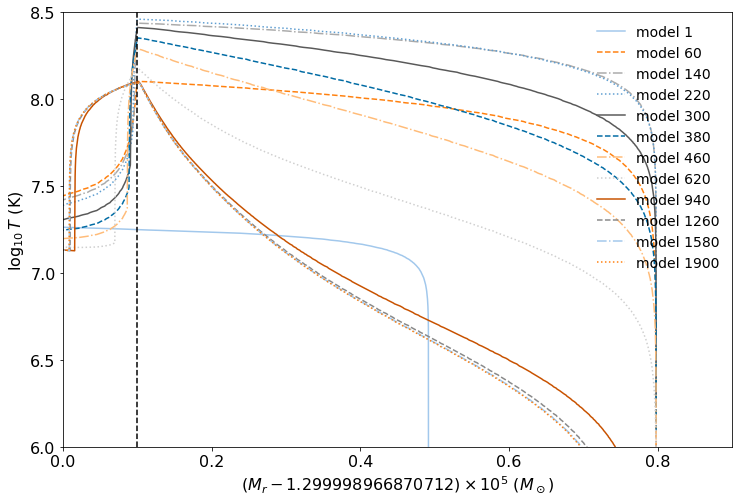

<Figure size 864x576 with 0 Axes>

In [13]:
# plot temperature profiles in selected models
# make plots only for accreted envelope 
# it is very thin in mass (~1e-5 Msun) relative to WD mass,
# therefore mass coordinate at left edge of plot, m_bot,
# has to be adjusted appropriately by redefining ita in the cell above
# if it's necessary

ifig=ifig+1;close(ifig);fig=figure(ifig)

ymin = 6.0
ymax = 8.5
yy = [ymin,ymax]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_logT = p_mod.get('logT')
        plot(mass,p_logT,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
        j += 1
    
    plot(xx,yy,'k--')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
    ylabel('$\log_{10}\,T\ (\mathrm{K})$')
    legend(frameon=False,loc=1)
    show()
    plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/logT.pdf')

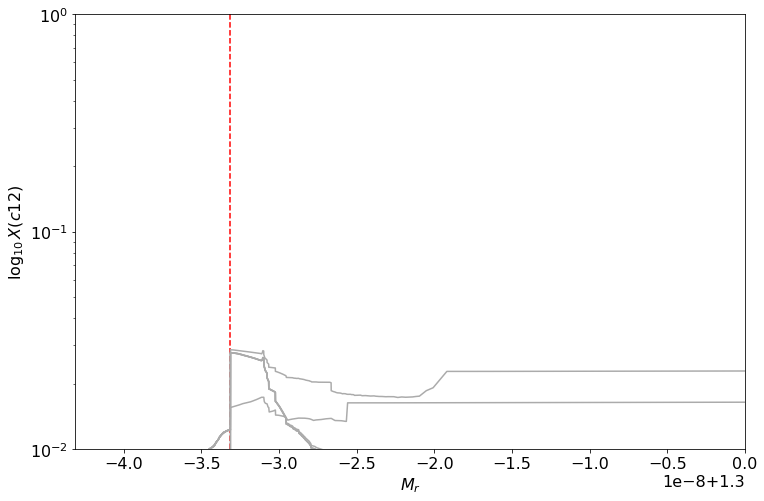

In [14]:
# plot C-12 abundance profile and use it to determine as accurately as 
# possible mass coordinate (in solar masses) of boundary between WD and 
# accreted H-rich envelope 
# there C-12 abundance jumps to its higher WD value
# this mass coordinate is used as input data in file ppn_frame.input
# to run mppnp post-processing nova nucleosynthesis computations

ifig=ifig+1; close(ifig); figure(ifig)

with get_devnull() as devnull, redirect_stdout(devnull):
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        p_logT = p_mod.get('logT')
        max_logT = max(p_logT)
        iso = 'c12'
        p_xiso = p_mod.get(iso)

        semilogy(p_mass,p_xiso,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))

ymin = 1e-2
ymax = 1e0
yy = [ymin,ymax]

# adjust this value as accurately as possible

if nova_case == 'co_nova':
    # 1.15 Msun CO nova model 
    mr_boundary = m_boundary_est
    # in this range of the mass coordinate
    xlim(mr_boundary-1e-8,1.15000502)
elif nova_case == 'ne_nova':
    # 1.3 Msun ONe nova model 
    mr_boundary = m_boundary_est
    # in this range of the mass coordinate
    xlim(mr_boundary-1e-8,1.3)
else:
    print ("\nnova case is not known")

vlines(mr_boundary,ymin,ymax,color='r',linestyle='dashed')
ylim(ymin,ymax)
xlabel('$M_r$')
ylabel('$\log_{10}\,X('+iso+')$')
rcParams["legend.handlelength"] = 3.0
show()

Requested new history.datasa; create new from history.data
 reading ...100% 

Closing history.data  tool ...


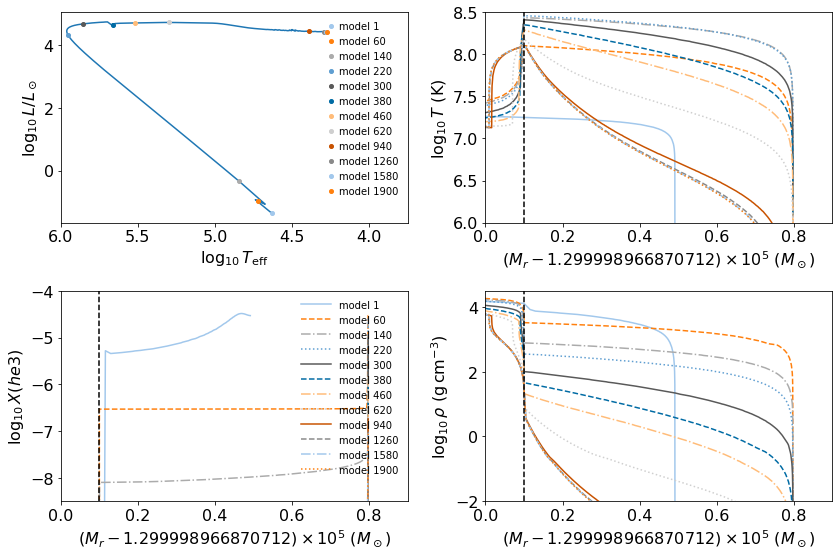

<Figure size 864x576 with 0 Axes>

In [15]:
# 4-panel summary plot of CO nova evolution

# add a plot of 
iso = 'he3'

ifig=ifig+1; close(ifig); figure(ifig)

subplot(2,2,1)

# plot nova evolution track
sh = ms.history_data(nova_dir,clean_starlog=True)
lgL = sh.get('log_L')
lgTeff = sh.get('log_Teff')
sh.hrd()

# add selcted models to the above HRD
lgL_plot = []
lgTeff_plot = []
clr = []

j = 0
for mod in model_sel:
    lgL_plot.append(lgL[mod-1])
    lgTeff_plot.append(lgTeff[mod-1])
    #print (j,mod,lgL_plot[j])
    plot(lgTeff_plot[j],lgL_plot[j],marker='o',markerfacecolor=ut.linestylecb(j)[2],markersize=4,\
         markeredgecolor=ut.linestylecb(j)[2],label='model '+str(mod))
    j += 1

xlabel('$\log_{10}\,T_\mathrm{eff}$')
ylabel('$\log_{10}\,L/L_\odot$')
xlim(6.0,3.75)
rcParams["legend.handlelength"] = 0.0
legend(frameon=False,loc=1,fontsize=10)
#text(4.0,-2.2,'a')

subplot(2,2,2)
ymin = 6.0
ymax = 8.5
yy = [ymin,ymax]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_logT = p_mod.get('logT')
        plot(mass,p_logT,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
        j += 1
    
    plot(xx,yy,'k--')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
    ylabel('$\log_{10}\,T\ (\mathrm{K})$')
    
#text(2.5,8.2,'b')

subplot(2,2,3)
with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        p_logT = p_mod.get('logT')
        max_logT = max(p_logT)
        iso = iso
        p_xiso = p_mod.get(iso)

        nm = len(p_mass)
        x = linspace(0,0,nm)
        y = linspace(0,0,nm)
        z = linspace(0,0,nm)

        k = 0
        for i in range(nm):
            if p_mass[i] < m_bot:
                break
            k += 1
            x[i] = (p_mass[i]-m_bot)*1e5
            y[i] = -30.
            if p_xiso[i] > 1e-30:
                y[i] = log10(p_xiso[i])

        plot(x[:k],y[:k],color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
    
        j += 1


xlim(0.0,xmax)
ymin = -8.5 # -3
ymax = -4 # 0
yy = [ymin,ymax]
plot(xx,yy,'k--')
ylim(ymin,ymax)
xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
ylabel('$\log_{10}\,X('+iso+')$')
rcParams["legend.handlelength"] = 3.0
legend(frameon=False,fontsize=10,loc=1)
#text(3.6,-17.3,'c')

subplot(2,2,4)
ymin = -2
ymax = 4.5
yy = [ymin,ymax]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_logRho = p_mod.get('logRho')
        plot(mass,p_logRho,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
        j += 1
    
    plot(xx,yy,'k--')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
    ylabel('$\log_{10}\,\\rho\ (\mathrm{g\,cm}^{-3})$')

#text(2.5,3.8,'d')
    
tight_layout()
show()
plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/four_panels.pdf')

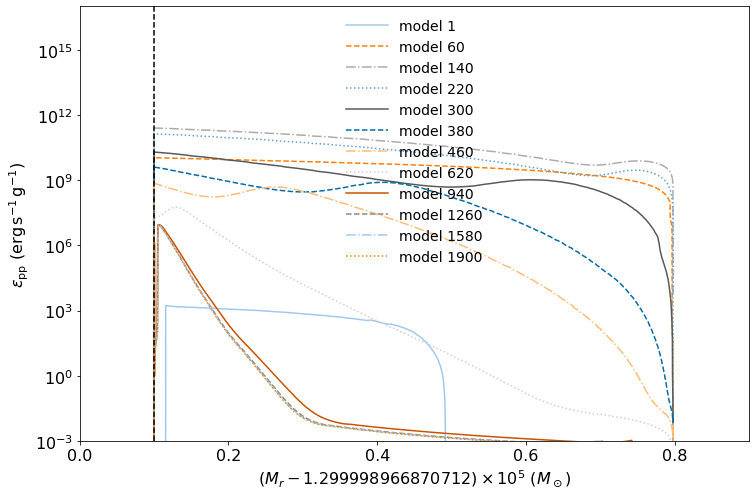

<Figure size 864x576 with 0 Axes>

In [16]:
# plot specific (per gram) energy production rates in pp chains
ifig=ifig+1;close(ifig);fig=figure(ifig)

ymin = 1e-3
ymax = 1e17
yy = [ymin,ymax]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_pp = p_mod.get('pp')
        p_cno = p_mod.get('cno')
        semilogy(mass,p_pp,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
        j += 1
    
    plot(xx,yy,'k--')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
    ylabel('$\\epsilon_\mathrm{pp}\ (\mathrm{erg\,s}^{-1}\mathrm{\,g}^{-1})$')
    legend(frameon=False)
    show()
    plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/eps_pp.pdf')

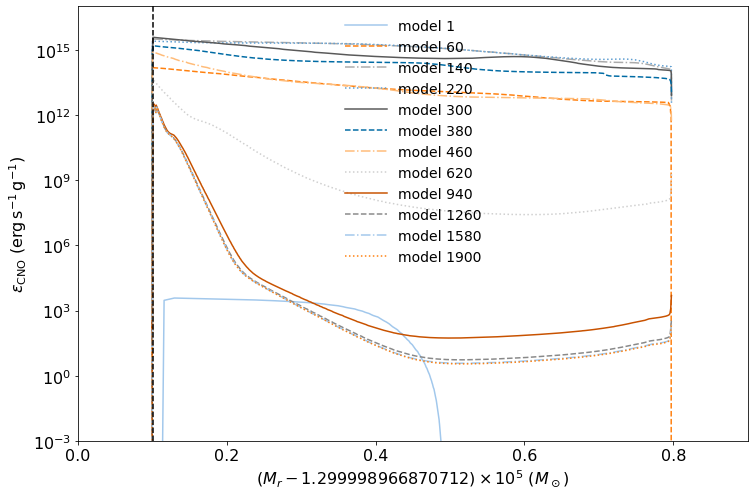

<Figure size 864x576 with 0 Axes>

In [17]:
# plot specific (per gram) energy production rates in the CNO cycle
ifig=ifig+1;close(ifig);fig=figure(ifig)

ymin = 1e-3
ymax = 1e17
yy = [ymin,ymax]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_cno = p_mod.get('cno')
        semilogy(mass,p_cno,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
        j += 1
    
    plot(xx,yy,'k--')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
    ylabel('$\\epsilon_\mathrm{CNO}\ (\mathrm{erg\,s}^{-1}\mathrm{\,g}^{-1})$')
    legend(frameon=False)
    show()
    plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/eps_cno.pdf')

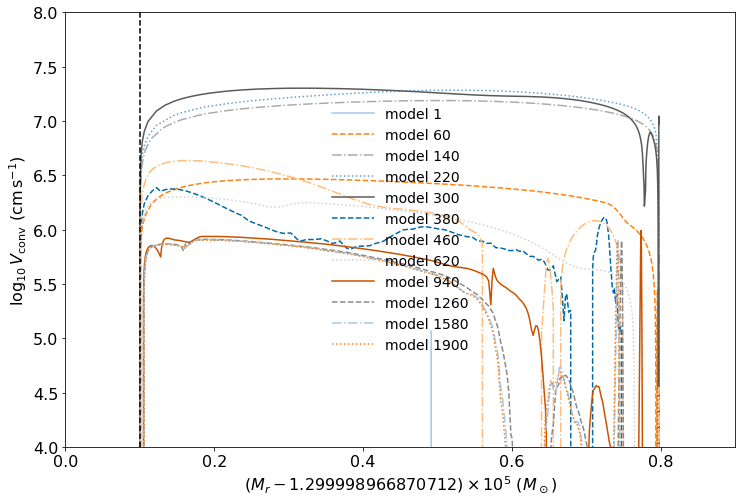

<Figure size 864x576 with 0 Axes>

In [18]:
# plot convective velocity (in m/s)
ifig=ifig+1;close(ifig);fig=figure(ifig)

ymin = 4
ymax = 8
yy = [ymin,ymax]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_logV = p_mod.get('log_conv_vel')
        plot(mass,p_logV,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
    
        j += 1
    
    plot(xx,yy,'k--')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
    ylabel('$\log_{10}\,V_\mathrm{conv}\ (\mathrm{cm\,s}^{-1})$')
    legend(frameon=False)
    show()
    plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/conv_velocity.pdf')

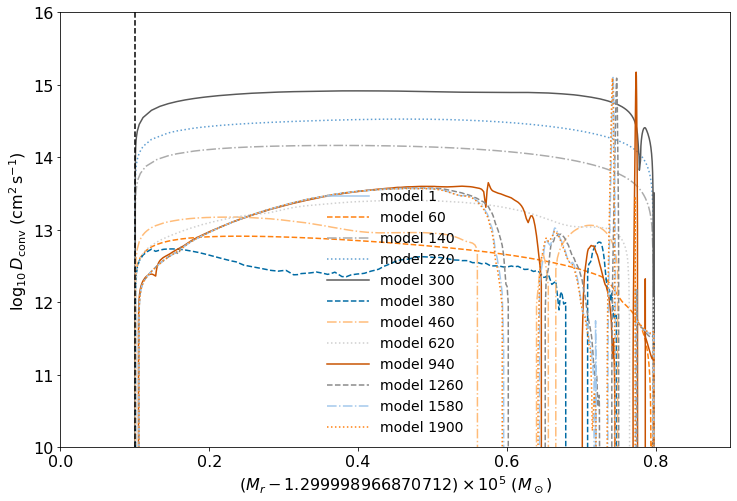

<Figure size 864x576 with 0 Axes>

In [19]:
# plot convective diffusion coefficient (in cm**2/s)
ifig=ifig+1;close(ifig);fig=figure(ifig)

ymin = 10
ymax = 16
yy = [ymin,ymax]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_logD = p_mod.get('log_D_mix')
        plot(mass,p_logD,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
        j += 1
    
    plot(xx,yy,'k--')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
    ylabel('$\log_{10}\,D_\mathrm{conv}\ (\mathrm{cm}^2\,\mathrm{s}^{-1})$')
    legend(frameon=False)
    show()
    plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/conv_diff_coeff.pdf')

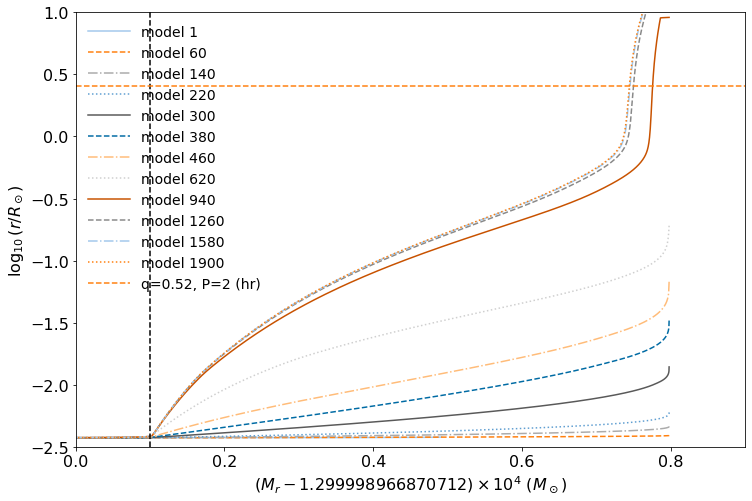

<Figure size 864x576 with 0 Axes>

In [20]:
# plot radius profiles
ifig=ifig+1;close(ifig);fig=figure(ifig)

ymin = -2.5
ymax = 1
yy = [ymin,ymax]

rLRsun = rLa1*aRsun
xxx = [0,xmax]
yyy = [rLRsun,rLRsun]

with get_devnull() as devnull, redirect_stdout(devnull):
    j = 0
    for mod in model_sel:
        p_mod=ms.mesa_profile(nova_dir,mod)
        p_mass = p_mod.get('mass')
        mass = 1e5*(p_mass-m_bot)
        p_logD = p_mod.get('logR')
        plot(mass,p_logD,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='model '+str(mod))
        j += 1
    
    plot(xx,yy,'k--')
    plot(xxx,yyy,color=ut.linestylecb(1)[2],linestyle='dashed',label='q='+str("{:.2}".format(q1))+', P='+str(P)+' (hr)')
    xlim(0.0,xmax)
    ylim(ymin,ymax)
    xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^4\ (M_\odot)$')
    ylabel('$\log_{10}\,(r/R_\odot)$')
    legend(frameon=False) 
    show()
    plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/radius.pdf')